In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
dir(iris)
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
iris.feature_names
df=pd.DataFrame(iris.data)
df['target']= iris.target
df.drop([0,1],axis = 1, inplace=True)
df.columns=[ 'petal length (cm)', 'petal width (cm)','target']
df

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


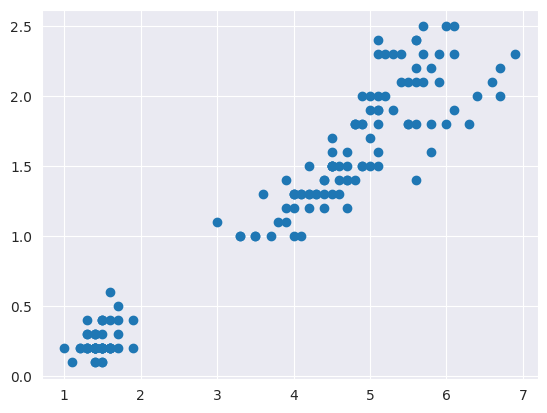

In [5]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

# Based on the result of scatter you choose how many clusster you would have(n_clusters=)

In [6]:
from sklearn.cluster import KMeans
km_model= KMeans(n_clusters=3)
km_model

KMeans(n_clusters=3)

In [7]:
predicted=km_model.fit_predict(df[['petal length (cm)','petal width (cm)']])
predicted
df['predicted']= predicted
df

/home/zahra/Projects/Training/Ml/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,petal length (cm),petal width (cm),target,predicted
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0
...,...,...,...,...
145,5.2,2.3,2,1
146,5.0,1.9,2,1
147,5.2,2.0,2,1
148,5.4,2.3,2,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


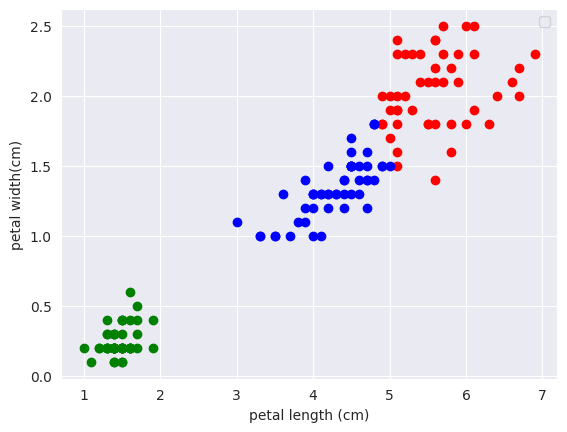

In [14]:
# df['predicted'] = df['predicted'].apply(lambda x: )
df0 = df[df['predicted']==0]
df1 = df[df['predicted']==1]
df2= df[df['predicted']==2]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='blue')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width(cm)')
plt.legend()

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
df

,petal length (cm),petal width (cm),target,predicted
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,1
146,0.677966,0.750000,2,1
147,0.711864,0.791667,2,1
148,0.745763,0.916667,2,1


In [22]:
km= KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['y_predicted'] = y_predicted

/home/zahra/Projects/Training/Ml/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


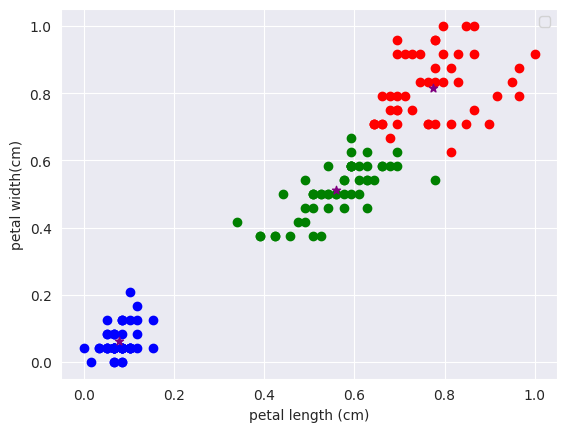

In [32]:
df0 = df[df['y_predicted']==0]
df1 = df[df['y_predicted']==1]
df2= df[df['y_predicted']==2]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='blue')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width(cm)')
plt.legend()
# plt.scatter(km.cluster_centers_[0][0],km.cluster_centers_[0][1],color='orange')
# plt.scatter(km.cluster_centers_[1][0],km.cluster_centers_[1][1],color='orange')
# plt.scatter(km.cluster_centers_[2][0],km.cluster_centers_[2][1],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

In [28]:
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.7740113 , 0.81510417],
       [0.07830508, 0.06083333]])

In [25]:
df['y_predicted'].value_counts()

0    52
2    50
1    48
Name: y_predicted, dtype: int64

In [26]:
df['predicted'].value_counts()

2    52
0    50
1    48
Name: predicted, dtype: int64

In [27]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [39]:
k_range= range(1,10)
sse=[]
for k in k_range:
    km= KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

/home/zahra/Projects/Training/Ml/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/zahra/Projects/Training/Ml/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/zahra/Projects/Training/Ml/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/zahra/Projects/Training/Ml/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: Fut

In [40]:
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920968,
 1.1588792731667126,
 0.8538617353912239,
 0.6801035704886195,
 0.5658013138564928,
 0.48580845539143697,
 0.41326677825124736]

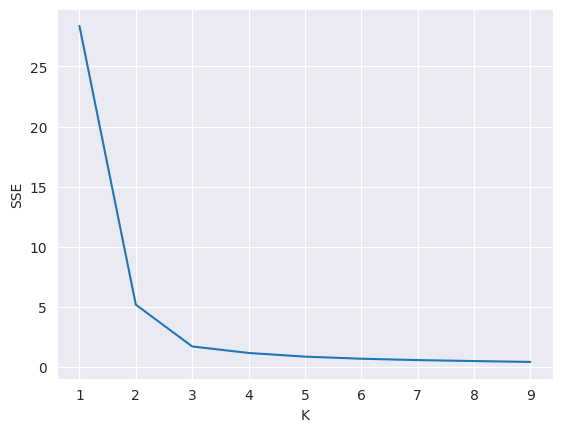

In [42]:
# plt.scatter(x= range(1,10), y = sse, color = 'blue')
# plt.ylabel('SSE')
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,sse)